In [1]:
from oggm import utils
import geopandas as gpd
from oggm import cfg
from oggm import tasks, utils, workflow, graphics, DEFAULT_BASE_URL, global_task
import xarray as xr
import matplotlib.pyplot as plt
from oggm.global_tasks import compile_fixed_geometry_mass_balance
import pandas as pd


In [2]:
def mass_balance_over_time(glacier_name = 'RGI60-15.03473', moyenne_annees = "10Y"):    
    # Initialize OGGM and set up the default run parameters
    cfg.initialize(logging_level='WARNING')

    # Local working directory (where OGGM will write its output)
    # WORKING_DIR = utils.gettempdir('OGGM_distr4')
    cfg.PATHS['working_dir'] = utils.get_temp_dir('OGGM_distributed', reset=True)

    rgi_ids = [glacier_name]  # This is Aletsch
    gdir = workflow.init_glacier_directories(rgi_ids, prepro_base_url=DEFAULT_BASE_URL, from_prepro_level=4, prepro_border=80)[0]



    donnees = compile_fixed_geometry_mass_balance(gdir)
    # Créer un DataFrame à partir des données fournies
    donnees = pd.DataFrame({
        'annee': [i for i in range(1901, 2020)],
        'donnees': donnees["RGI60-15.03473"]
    })

    # Convertir la colonne 'annee' en type de données datetime
    donnees['annee'] = pd.to_datetime(donnees['annee'], format='%Y')

    # Définir la colonne 'annee' comme index
    donnees = donnees.set_index('annee')

    # Calculer la moyenne sur une période de 5 ans
    moyenne_5_ans = donnees['donnees'].resample(moyenne_annees).mean()

    # Afficher le DataFrame avec la moyenne tous les 5 ans
    plt.plot(moyenne_5_ans)

    print(moyenne_5_ans)


2024-04-29 17:29:30: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-04-29 17:29:30: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-04-29 17:29:30: oggm.cfg: Multiprocessing: using all available processors (N=8)
2024-04-29 17:29:31: oggm.workflow: init_glacier_directories from prepro level 4 on 1 glaciers.
2024-04-29 17:29:31: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2024-04-29 17:29:34: oggm.utils: Applying global task compile_fixed_geometry_mass_balance on 1 glaciers
2024-04-29 17:29:34: oggm.workflow: Execute entity tasks [fixed_geometry_mass_balance] on 1 glaciers


annee
1901-12-31   -538.027728
1911-12-31    670.840712
1921-12-31    405.686663
1931-12-31    117.011530
1941-12-31    163.044083
1951-12-31    135.376783
1961-12-31    318.036316
1971-12-31    131.436680
1981-12-31    -51.906509
1991-12-31     99.398862
2001-12-31   -151.323860
2011-12-31   -516.570966
2021-12-31   -467.235476
Freq: 10A-DEC, Name: donnees, dtype: float64


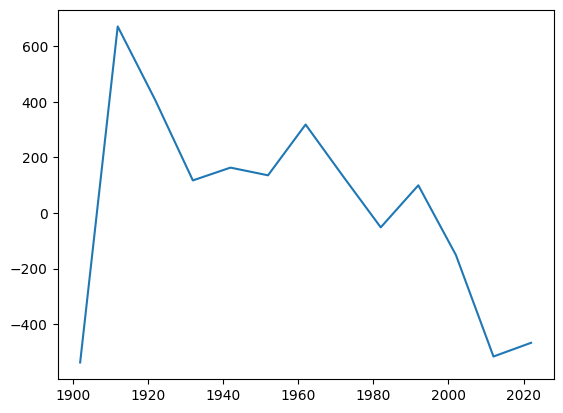

In [3]:
mass_balance_over_time()